Gruppe 56

Olav Axelsen - olavaxel@oslomet.no

Sindre Kulstad Johannessen - S374208@oslomet.no

Carl Hardhaug - S374205@oslomet.no

Sigurd Smeby - S360789@oslomet.no


vi valgte oppgave 2, og valgte og bruke lineær regressjon, siden vi skal forrutse kontinuerlige verdier. hvis vi skulle brukt klassifisering, kunne vi bare fått diskrete verdier tilbake fra modellen vår.

In [366]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
#importerer nødvendige bibliotekas

In [367]:
url = "Ruter-data.csv"
df = pd.read_csv(url, sep=";")

#kjører df.head for å se på dataen vår
df.head(10)


,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
5,3110-2020-08-01T16:16:00+02:00,01/08/2020,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,0,17:22:56,17:23:23,17:16:00,17:16:00,151,8
6,15010-2020-07-28T13:09:00+02:00,28/07/2020,Viken,Vest,Bærum,Nedre Toppenhaug,Øvre Toppenhaug,Lokal,Viken,150,0,13:19:00,13:19:05,13:17:00,13:17:00,112,1
7,15003-2020-07-27T06:18:00+02:00,27/07/2020,Oslo,Indre By,St.Hanshaugen,Hammersborggata (ved Storgata retning vest),St. Olavs plass (mot Frederiks gate),Lokal,Viken,150,1,06:20:24,06:20:29,06:20:00,06:20:00,112,-1
8,21002-2020-08-16T14:33:00+02:00,16/08/2020,Viken,Vest,Bærum,Stein gård,Knabberudveien,Lokal,Viken,150,1,15:10:12,15:10:34,15:09:00,15:09:00,112,2
9,15002-2020-08-13T18:09:00+02:00,13/08/2020,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,0,18:37:41,18:38:19,18:29:00,18:29:00,112,4


In [368]:
df.describe()

,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord
count,6000.000000,6000.000000,6000.000000
mean,0.492000,104.712167,4.512833
std,0.499978,24.225196,6.735730
min,0.000000,33.000000,-39.000000
25%,0.000000,80.000000,0.000000
50%,0.000000,106.000000,3.000000
75%,1.000000,112.000000,7.000000
max,1.000000,151.000000,64.000000


Vi ser i df.describe at minimumsverdien til passasjerer ombord er -39, som ikke er en mulig verdi for antall passasjerer. derfor dropper vi alle datapunkter med passasjerer ombord mindre enn 0

In [369]:
#begolder bare linjer der passasjerer ombord er større eller lik 0
df = df[df["Passasjerer_Ombord"]>=0]
df.describe()

,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord
count,5333.000000,5333.000000,5333.000000
mean,0.475530,105.052503,5.601163
std,0.499448,24.255181,6.160011
min,0.000000,33.000000,0.000000
25%,0.000000,80.000000,1.000000
50%,0.000000,106.000000,4.000000
75%,1.000000,112.000000,8.000000
max,1.000000,151.000000,64.000000


# Finner busslinjen med flest datapunkter
For å lage en så nøyaktig modell som mulig, finner vi ut av hvilken rute som forekommer oftest i datasettet vårt, og velger å bruke den ruten

In [370]:
# Kjører df.describe for å få en bedre oversikt over linjene
df["Linjenavn"].describe()


count     5333
unique     148
top        100
freq       423
Name: Linjenavn, dtype: object

In [371]:

# Hente unike linjenavn
linje = df["Linjenavn"].unique()

# Liste med alle linjene
linjeliste = df["Linjenavn"]

# Initialisere variabler for å holde styr på datapunktene våre
flestDatapunkter = 0
flestDatapunkterLinje = ""

# Gå gjennom hvert unikt linjenavn
for linjen in linje:
    antall = 0

    for j in linjeliste:
        if j == linjen:
            antall += 1

    if antall > flestDatapunkter:
        flestDatapunkter = antall
        flestDatapunkterLinje = linjen

# Skriv ut resultatet
print(f"Linjen vår: {flestDatapunkterLinje}\nAntall datapunkter: {flestDatapunkter}")


Linjen vår: 100
Antall datapunkter: 423


Her velger vi busslinjen med flest datapunkter, som i vårt tilfelle blir linje 100

In [372]:
df = df[df["Linjenavn"] == flestDatapunkterLinje]
# hvis vi vil velge en egen linje:
# df = df[df["Linjenavn"] == "250"] 

#kjører describe for å få noe oversikt over hvordan dataen vår ser ut
df.describe()

,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord
count,423.000000,423.0,423.000000
mean,0.472813,151.0,8.513002
std,0.499852,0.0,7.599838
min,0.000000,151.0,0.000000
25%,0.000000,151.0,3.000000
50%,0.000000,151.0,7.000000
75%,1.000000,151.0,12.000000
max,1.000000,151.0,40.000000


In [373]:
df.drop(["TurId", "Fylke", "Område", "Kommune", "Holdeplass_Fra", "Holdeplass_Til", "Linjetype", "Linjefylke", "Linjenavn",	"Linjeretning"	,"Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra",	"Tidspunkt_Faktisk_Avgang_Holdeplass_Fra",	"Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra",	"Tidspunkt_Planlagt_Avgang_Holdeplass_Fra"], axis='columns', inplace=True)


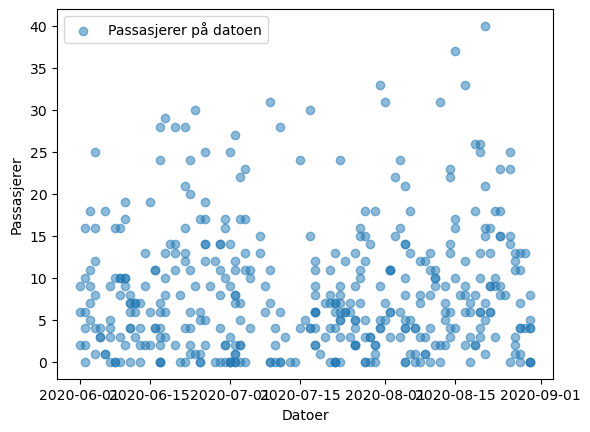

In [374]:
import datetime
#Vi konverterer datoene våre til datetime, for å letter kunne jobbe med de
df['Dato'] = pd.to_datetime(df['Dato'], format='%d/%m/%Y')

plt.scatter(df["Dato"], df["Passasjerer_Ombord"], label="Passasjerer på datoen", alpha=0.5)
plt.legend()
plt.xlabel("Datoer")
plt.ylabel("Passasjerer")
plt.show()


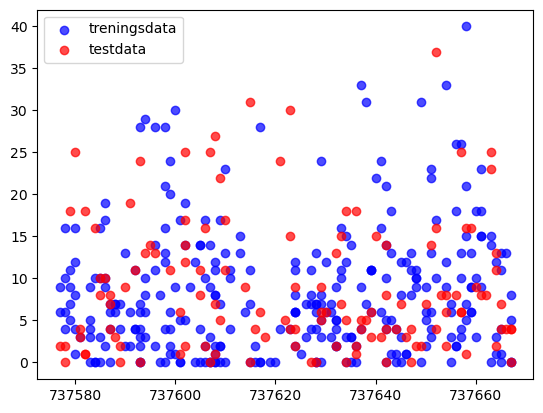

In [375]:
# Konverterer datoene til "ordinal" fordi ellers får vi ikke det til
X = df['Dato'].apply(lambda x: x.toordinal())  
Y = df['Passasjerer_Ombord'].values

# Kjører train test split, vi setter av 30% til test sett, og setter en random_state sånn at vi får samme resultat hver gang vi kjører koden, da er det enklere å teste
X_train, X_test, Y_train, Y_test = train_test_split(X.values.reshape(-1,1), Y, test_size=0.3, random_state=11)

#Visualisering av splitten
plt.scatter(X_train, Y_train, label="treningsdata", alpha=0.7, color='blue')
plt.scatter(X_test, Y_test, label="testdata", alpha=0.7, color='red')
plt.legend()
plt.show()



In [376]:

#Linear regression
model = LinearRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)




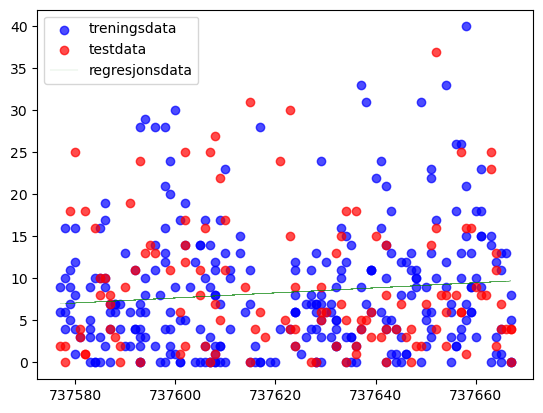

In [377]:
plt.scatter(X_train, Y_train, label="treningsdata", alpha=0.7, color='blue')
plt.scatter(X_test, Y_test, label="testdata", alpha=0.7, color='red')
plt.plot(X_test, Y_pred, label="regresjonsdata", alpha=0.7, color="green", linewidth=0.1, linestyle='-')
plt.legend()
plt.show()

In [378]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluering av modellen, her bruker vi test dataene våre

#denne funksjonen kvadrerer avstanden fra y verdien som modellen vår har predicted til
#hvor y verdien faktisk havner, for hver x i tessettet vårt, så gir den oss medianen av det
#derav mean squared error
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')

#R kvadrert score:
#poenguummen sier noe om hvor god modellen er til å predicte, basert på test verdiene vi skillte ut i starten.
# går fra 
r2 = r2_score(Y_test, Y_pred)
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 63.38319746525637
R-squared (R2) Score: -0.02459243304280534


In [379]:
#Her er ett lite frampek til hvorfor modellen vår er så dårlig
df.corr()

,Dato,Kjøretøy_Kapasitet,Passasjerer_Ombord
Dato,1.000000,NaN,0.060001
Kjøretøy_Kapasitet,NaN,NaN,NaN
Passasjerer_Ombord,0.060001,NaN,1.000000


# Vurdering av scoren vår

modellen vår er veldig dårlig til å forutse antall passasjerer på den gitte linja, det kan vi se på at r2 scoren vår er negativ. og at mse'en vår er ~63 som vil si at vi bommer med nesten 8 passasjerer i median. 

Grunnen til dette er sannsynligvis at dataene vi lager modellen på ikke har en høy korrelasjon, som vi ser npr vi kjører df.corr(), og derfor vil alltid det å forrutse antall passasjerer utifra dato være vannskelig, når datoen og antall passasjerer har en korrelasjon på 0.06(veldig liten).



In [380]:
#Her er kan vi sette inn en dato, og få ut en predicted verdi

dato = "01/09/2020"

#vi må gjøre alle disse konverteringene pga det er det vi har gjort i modellen vår
datoDatetime = pd.to_datetime(dato, format='%d/%m/%Y')
ordinalverdi = datoDatetime.toordinal()
print(ordinalverdi)
forventedAntallPassasjerer = model.predict([[ordinalverdi]])
print(forventedAntallPassasjerer)

737669
[9.76594695]
